## Step  Setting the Stage

Instead of creating a new Stage or loading one from a file, we'll use the `omni.usd` API to get the currently loaded stage in Omniverse Code. This is the only Omniverse-specific code that we will use or this lab.

### Step 1.1 Getting the Stage

**Add** the following lines to the code block below:

``` python
from pxr import Usd, UsdGeom
import omni.usd

stage = omni.usd.get_context().get_stage()
print(stage) 
```

After pasting the code **run** the cell by **selecting** the cell then **hitting** the run button at the top. You can also run it by selecting the cell and pressing *Ctrl+Enter*.

Once the cell is run it will print below it. As you can see it will print the stage right to the Jupyter Notebook. 

In [1]:
# PASTE CODE HERE
#
#

#
#

### Completed Code for Step 1.1

In [ ]:
from pxr import Usd, UsdGeom
import omni.usd

stage = omni.usd.get_context().get_stage()
print(stage) 

### Step 1.2 Defining a Default Prim

**Add** the following lines to the code block below.

``` python
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)
```

Let's create an Xform prim at the path `/World`. This will serve as the top-level transform for our asset. It’s best practice to set the *defaultPrim metadata* on a Stage if the Stage’s root layer may be used as a Reference or Payload. Otherwise, consumers of your Stage are forced to provide a target prim when they create a Reference or Payload arc. Even though the Usd.Stage.SetDefaultPrim() accepts any Usd.Prim, the default prim must be a top-level prim on the Stage. We're also using `UsdStage.RemovePrim()` out of convenience to clear the Stage so that we can re-run the same code as we iterate without running into conflicts.

In [ ]:
from pxr import Usd, UsdGeom
import omni.usd

stage = omni.usd.get_context().get_stage()

# PASTE CODE UNDER HERE

### Completed Code for Step 1.2

In [ ]:
from pxr import Usd, UsdGeom
import omni.usd

stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

### Step 1.3 Run & Inspect USD

We will now verify that the above code is working and observe how the Stage is cleared using UsdStage.RemovePrim(). Before running the cell, **create** a cube in the scene by `Right Click in the Viewport > Create > Mesh > Cube`.

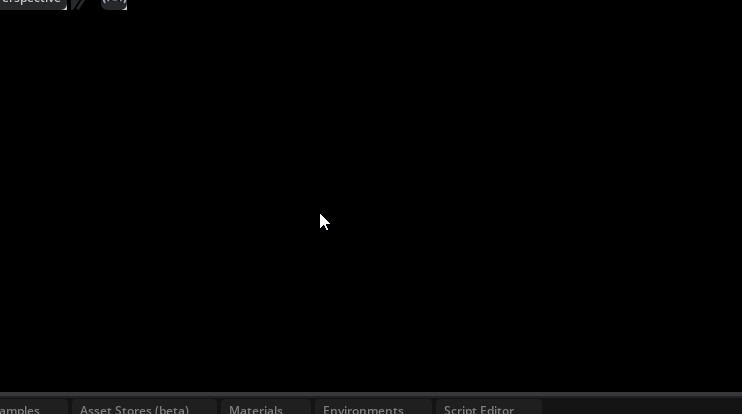

Now **run** the cell and notice that the cube disappears. This is because we are removing the prim named "World" and Defining a new prim "World".

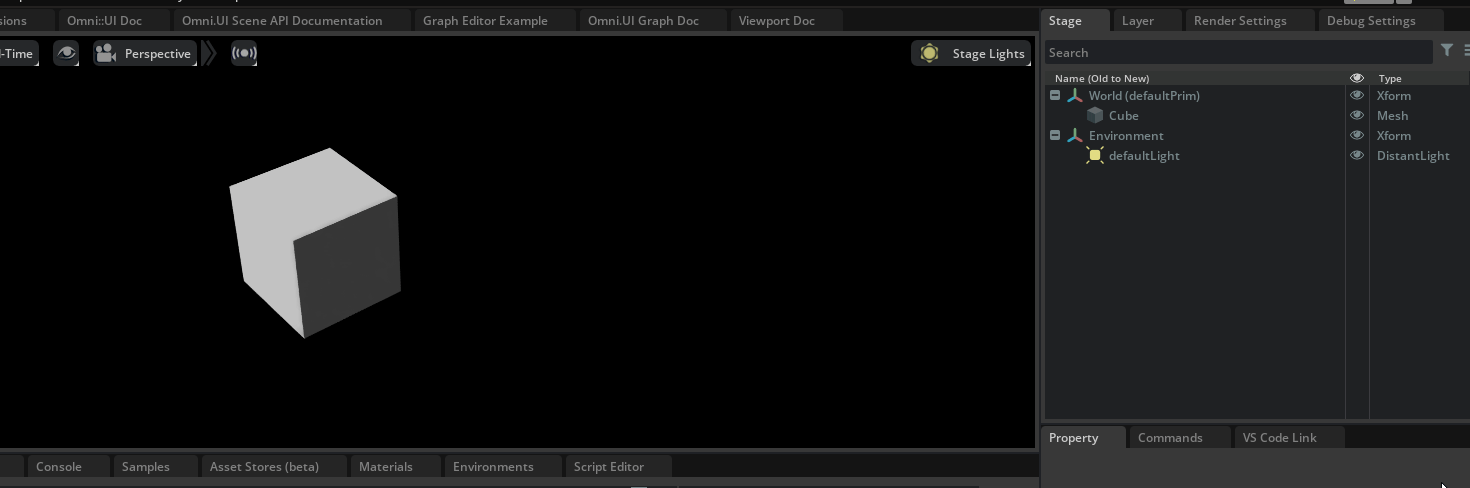

## Step 2 Defing Prims and their Attributes

### Step 2.1 Define a Palette

**Add** the following code to the cell below:

``` python
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
```

Defining a prim is an attempt to create a prim at the path defined. By using `UsdGeom.Xform.Define()`, we can create a Xform prim. To create a Sphere you would replace `Xform` with `Sphere`. 

In [ ]:
from pxr import Usd, UsdGeom
import omni.usd

def add_palette(stage, parent_prim):

    # PASTE CODE UNDER HERE


stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)

### Step 2.2 Exploring USDA

**Run** the cell after pasting the code. In the *Stage tab* there will now be a new Xform Prim called *Pallet_A1*.

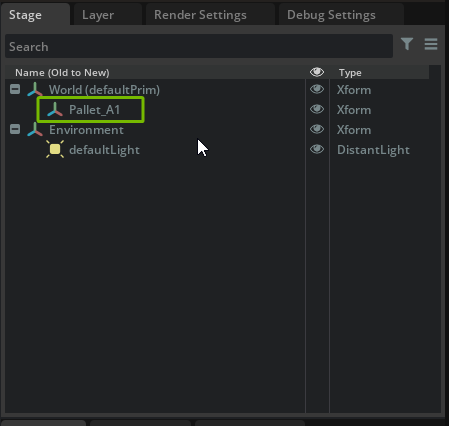

In the USD file, the Pallet_A1 is being defined within World. Here's what the USD file would look like before and after.

Before:
``` json
def Xform "World"
{
}
```

After:
``` json
def Xform "World"
{
    def Xform "Pallet_A1"
    {
    }
}
```

To view the contents of the usd file from Omniverse **go to** `Layers > Right Click on Root Layer > Edit`. This will create an instance of Visual Studio Code with the Usd Code.

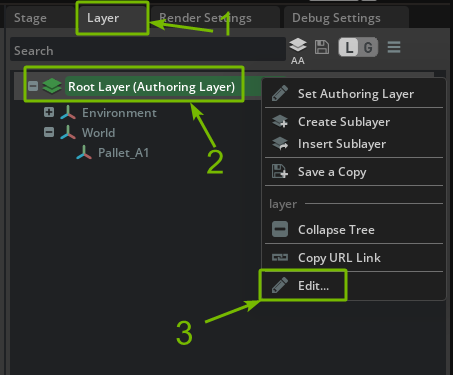

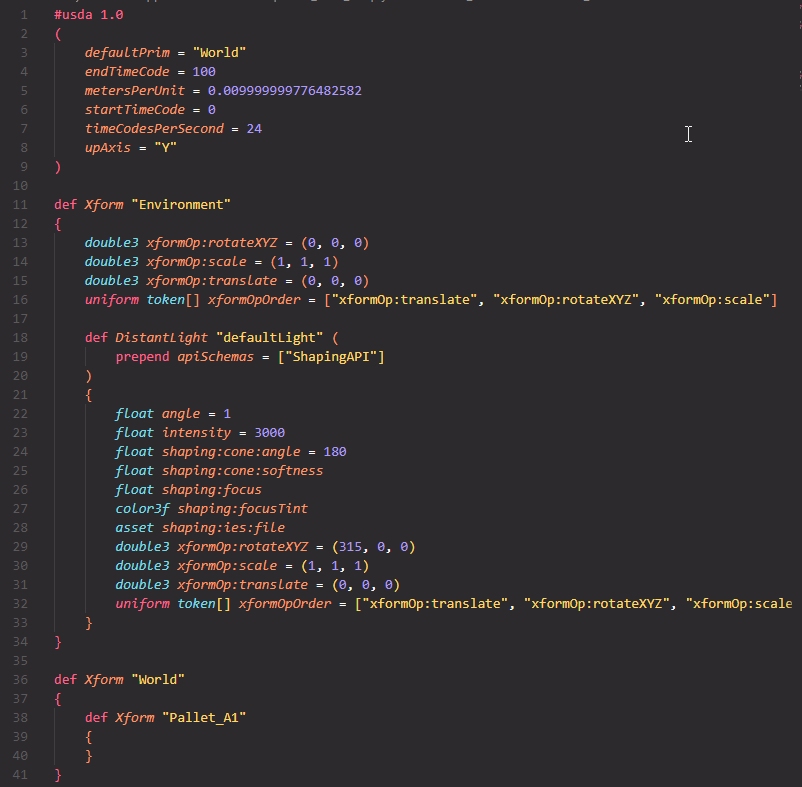

### Complete Code for Step 2.1

In [ ]:
from pxr import Usd, UsdGeom
import omni.usd

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()

stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)

### Step 2.3 Adding a Reference

**Add** the following code to the cell below:

``` python
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
```

In [ ]:
import omni.usd
from pxr import UsdGeom, Usd

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    
    # PASTE CODE UNDER HERE

    
    
stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)

References are one of the most basic composition arcs. The primary use for References is to assemble smaller units of scene description into larger scene.

Note how we're referencing a USD file using the HTTP protocol. Omniverse has an asset resolver plugin that allows for loading USD files using HTTP. 

**Run** the cell and you should see a Pallet object in the stage.

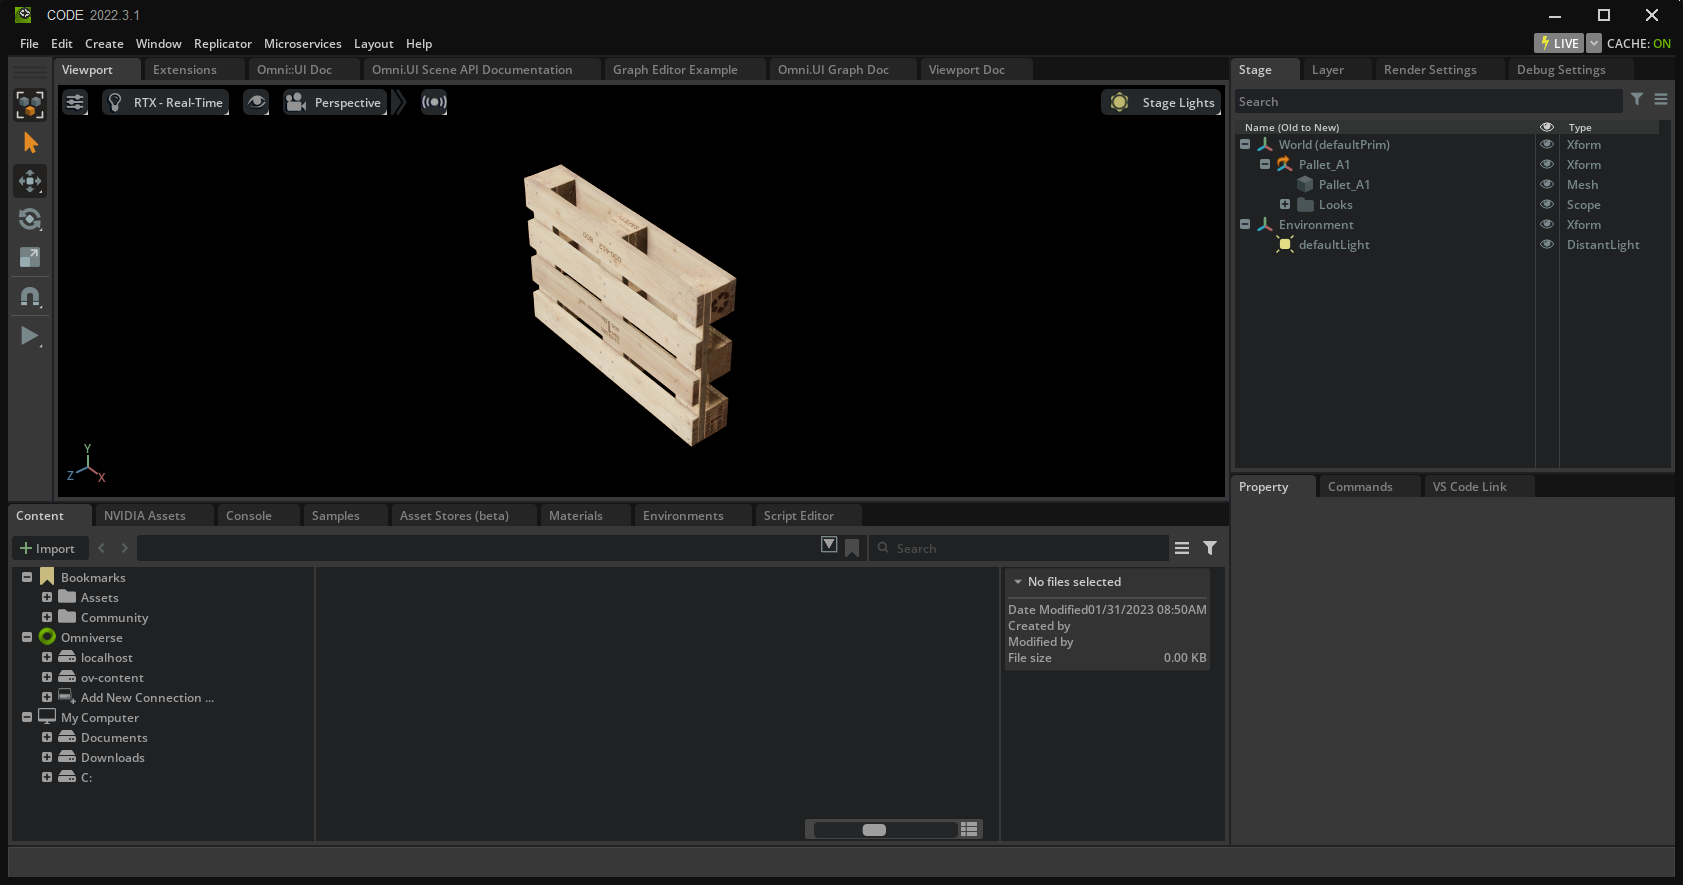

### Complete Code for Step 2.3

In [ ]:
import omni.usd
from pxr import UsdGeom, Usd

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
    
stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)

### Step 2.4 Adding Attributes

**Add** the following code to the cell below:

``` python
    xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble)
    xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, 0, 0]))
    xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
```

In [ ]:
import omni.usd
from pxr import UsdGeom, Usd, Gf

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
    
    # PASTE CODE UNDER HERE

    
stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)

Attributes are the most common type of property authored in most USD scenes. Attributes are Properties with direct values that may vary over time. An attribute can take on exactly one of the legal attribute typeNames USD provides, and can take on both a default value and a value each at any number of timeSamples. For this step, we're using the `UsdGeom.Xformable` interface to set the translation, rotation, and scale because it is more concise this way, but you could use the generic `Usd.Prim.CreateAttribute()` method to do the same. [Learn more about USD attribute types and how to work with them using the USD Python API.](https://docs.omniverse.nvidia.com/prod_usd/prod_usd/quick-start/usd-types.html)

After running the cell the Pallet will be rotated to be laying flat instead of standing up on it's side.

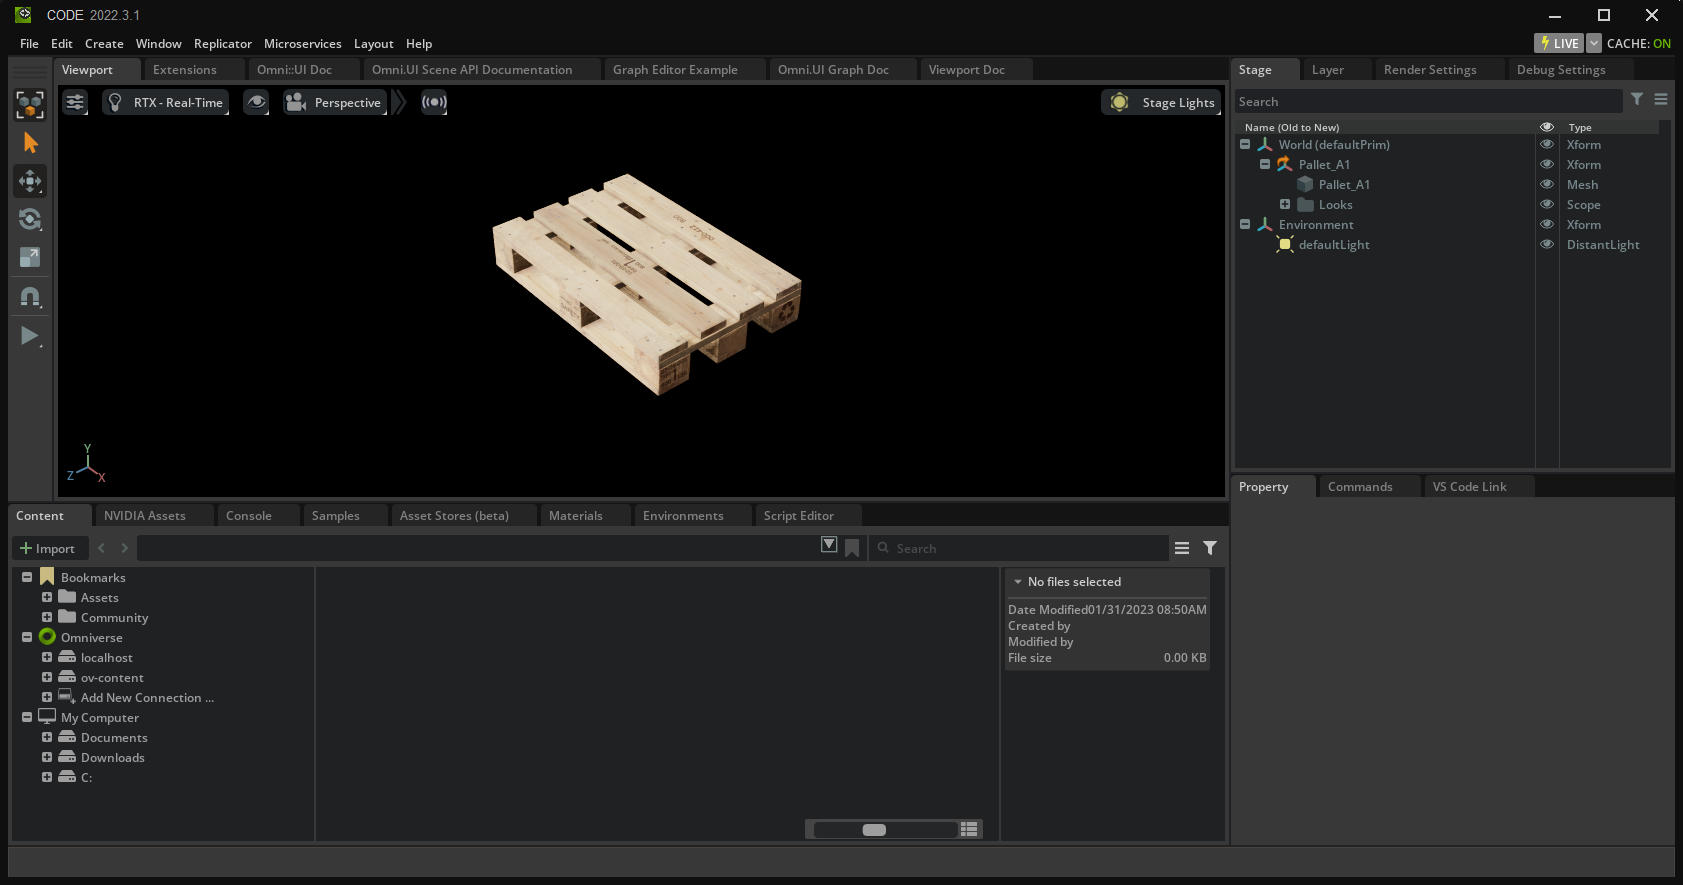

### Complete Code for Step 2.4

In [ ]:
import omni.usd
from pxr import UsdGeom, Usd, Gf

def add_palette(stage: Usd.Stage, parent_prim: Usd.Prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
    xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble)
    xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, 0, 0]))
    xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)

### Exploration:

Can we change the default values for each attribute (translate, rotate, scale)? How does it effect the prims in our stage or what the changes look like within the USD file? 

If we remove the line `xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)` how does it effect the Usd file?

How can we add another palette to the scene?


## Step 2.5 Challenge: Creating the Boxes

Given the code below, see if you can create the Boxes in the stage based on what we know about Prims and using the USD API. Here's a reference image for what the final product should look like:

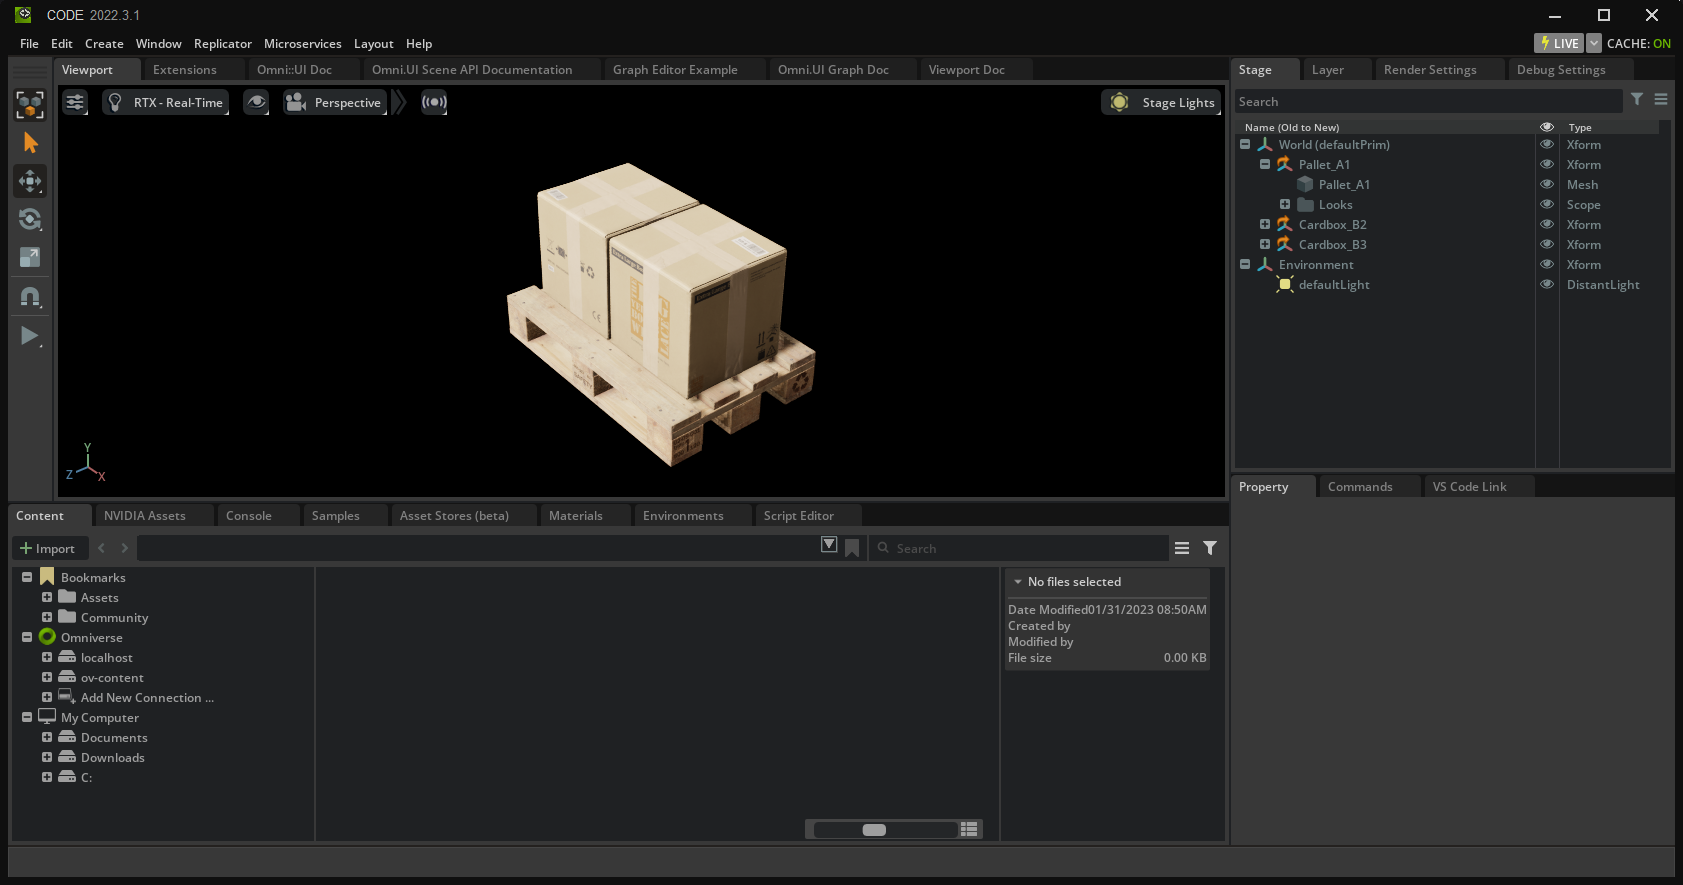

In [ ]:
import omni.usd
from pxr import UsdGeom, Usd, Gf

BOX_WIDTH = 53.0

boxes = {
    "Cardbox_B2": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B2.usd",
    "Cardbox_B3": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B3.usd"
}

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
    xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble)
    xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, 0, 0]))
    xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
def add_boxes(stage, parent_prim, y_pos: float=21, y_rot: float= 0):
    start_x = -(BOX_WIDTH / 2)
    for i, box_name in enumerate(boxes):
        
        # CODE GOES UNDER HERE
        
    
stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)
add_boxes(stage, default_prim)

### Complete Code for Step 2.5

In [ ]:
import omni.usd
from pxr import UsdGeom, Usd, Gf

BOX_WIDTH = 53.0

boxes = {
    "Cardbox_B2": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B2.usd",
    "Cardbox_B3": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B3.usd"
}

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
    xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble)
    xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, 0, 0]))
    xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
def add_boxes(stage, parent_prim, y_pos: float=21, y_rot: float= 0):
    start_x = -(BOX_WIDTH / 2)
    for i, box_name in enumerate(boxes):
        xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath(box_name))
        prim: Usd.Prim = xform.GetPrim()
        prim.GetReferences().AddReference(boxes[box_name])
        xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([start_x + i * BOX_WIDTH, y_pos, 0]))
        xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, y_rot, 0]))
        xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)
add_boxes(stage, default_prim)



## Step 2.6 Creating Custom Attributes

Attributes are the workhorse of storing actual data inside a Prim. Attributes are often defined as part of Schemas to make it easier to access context-relevant data from within an instance of that Type. For our example we will create a custom attribute that adds a Universally Unique Identifier (UUID) to each box. 

**Add** the following code to the cell below:

``` python
        box_uuid =uuid.uuid4()
        prim.CreateAttribute("box_uuid", Sdf.ValueTypeNames.String).Set(box_uuid.hex)

```

After pasting **run** the cell. 

In [ ]:
import omni.usd
from pxr import UsdGeom, Usd, Gf, Sdf
import uuid

BOX_WIDTH = 53.0

boxes = {
    "Cardbox_B2": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B2.usd",
    "Cardbox_B3": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B3.usd"
}

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
    xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble)
    xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, 0, 0]))
    xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
def add_boxes(stage, parent_prim, y_pos: float=21, y_rot: float= 0):
    start_x = -(BOX_WIDTH / 2)
    for i, box_name in enumerate(boxes):
        xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath(box_name))
        prim: Usd.Prim = xform.GetPrim()
        prim.GetReferences().AddReference(boxes[box_name])
        xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([start_x + i * BOX_WIDTH, y_pos, 0]))
        xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, y_rot, 0]))
        xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)

        # PASTE CODE UNDER HERE

        
stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)
add_boxes(stage, default_prim)



After the cell runs:
1. **Select** one of the boxes in the stage
2. **Scroll down** in the *Properties window* and **click** on *Raw USD Properties* to unexample the tab
3. *Locate* the `box_uuid` attribute just created

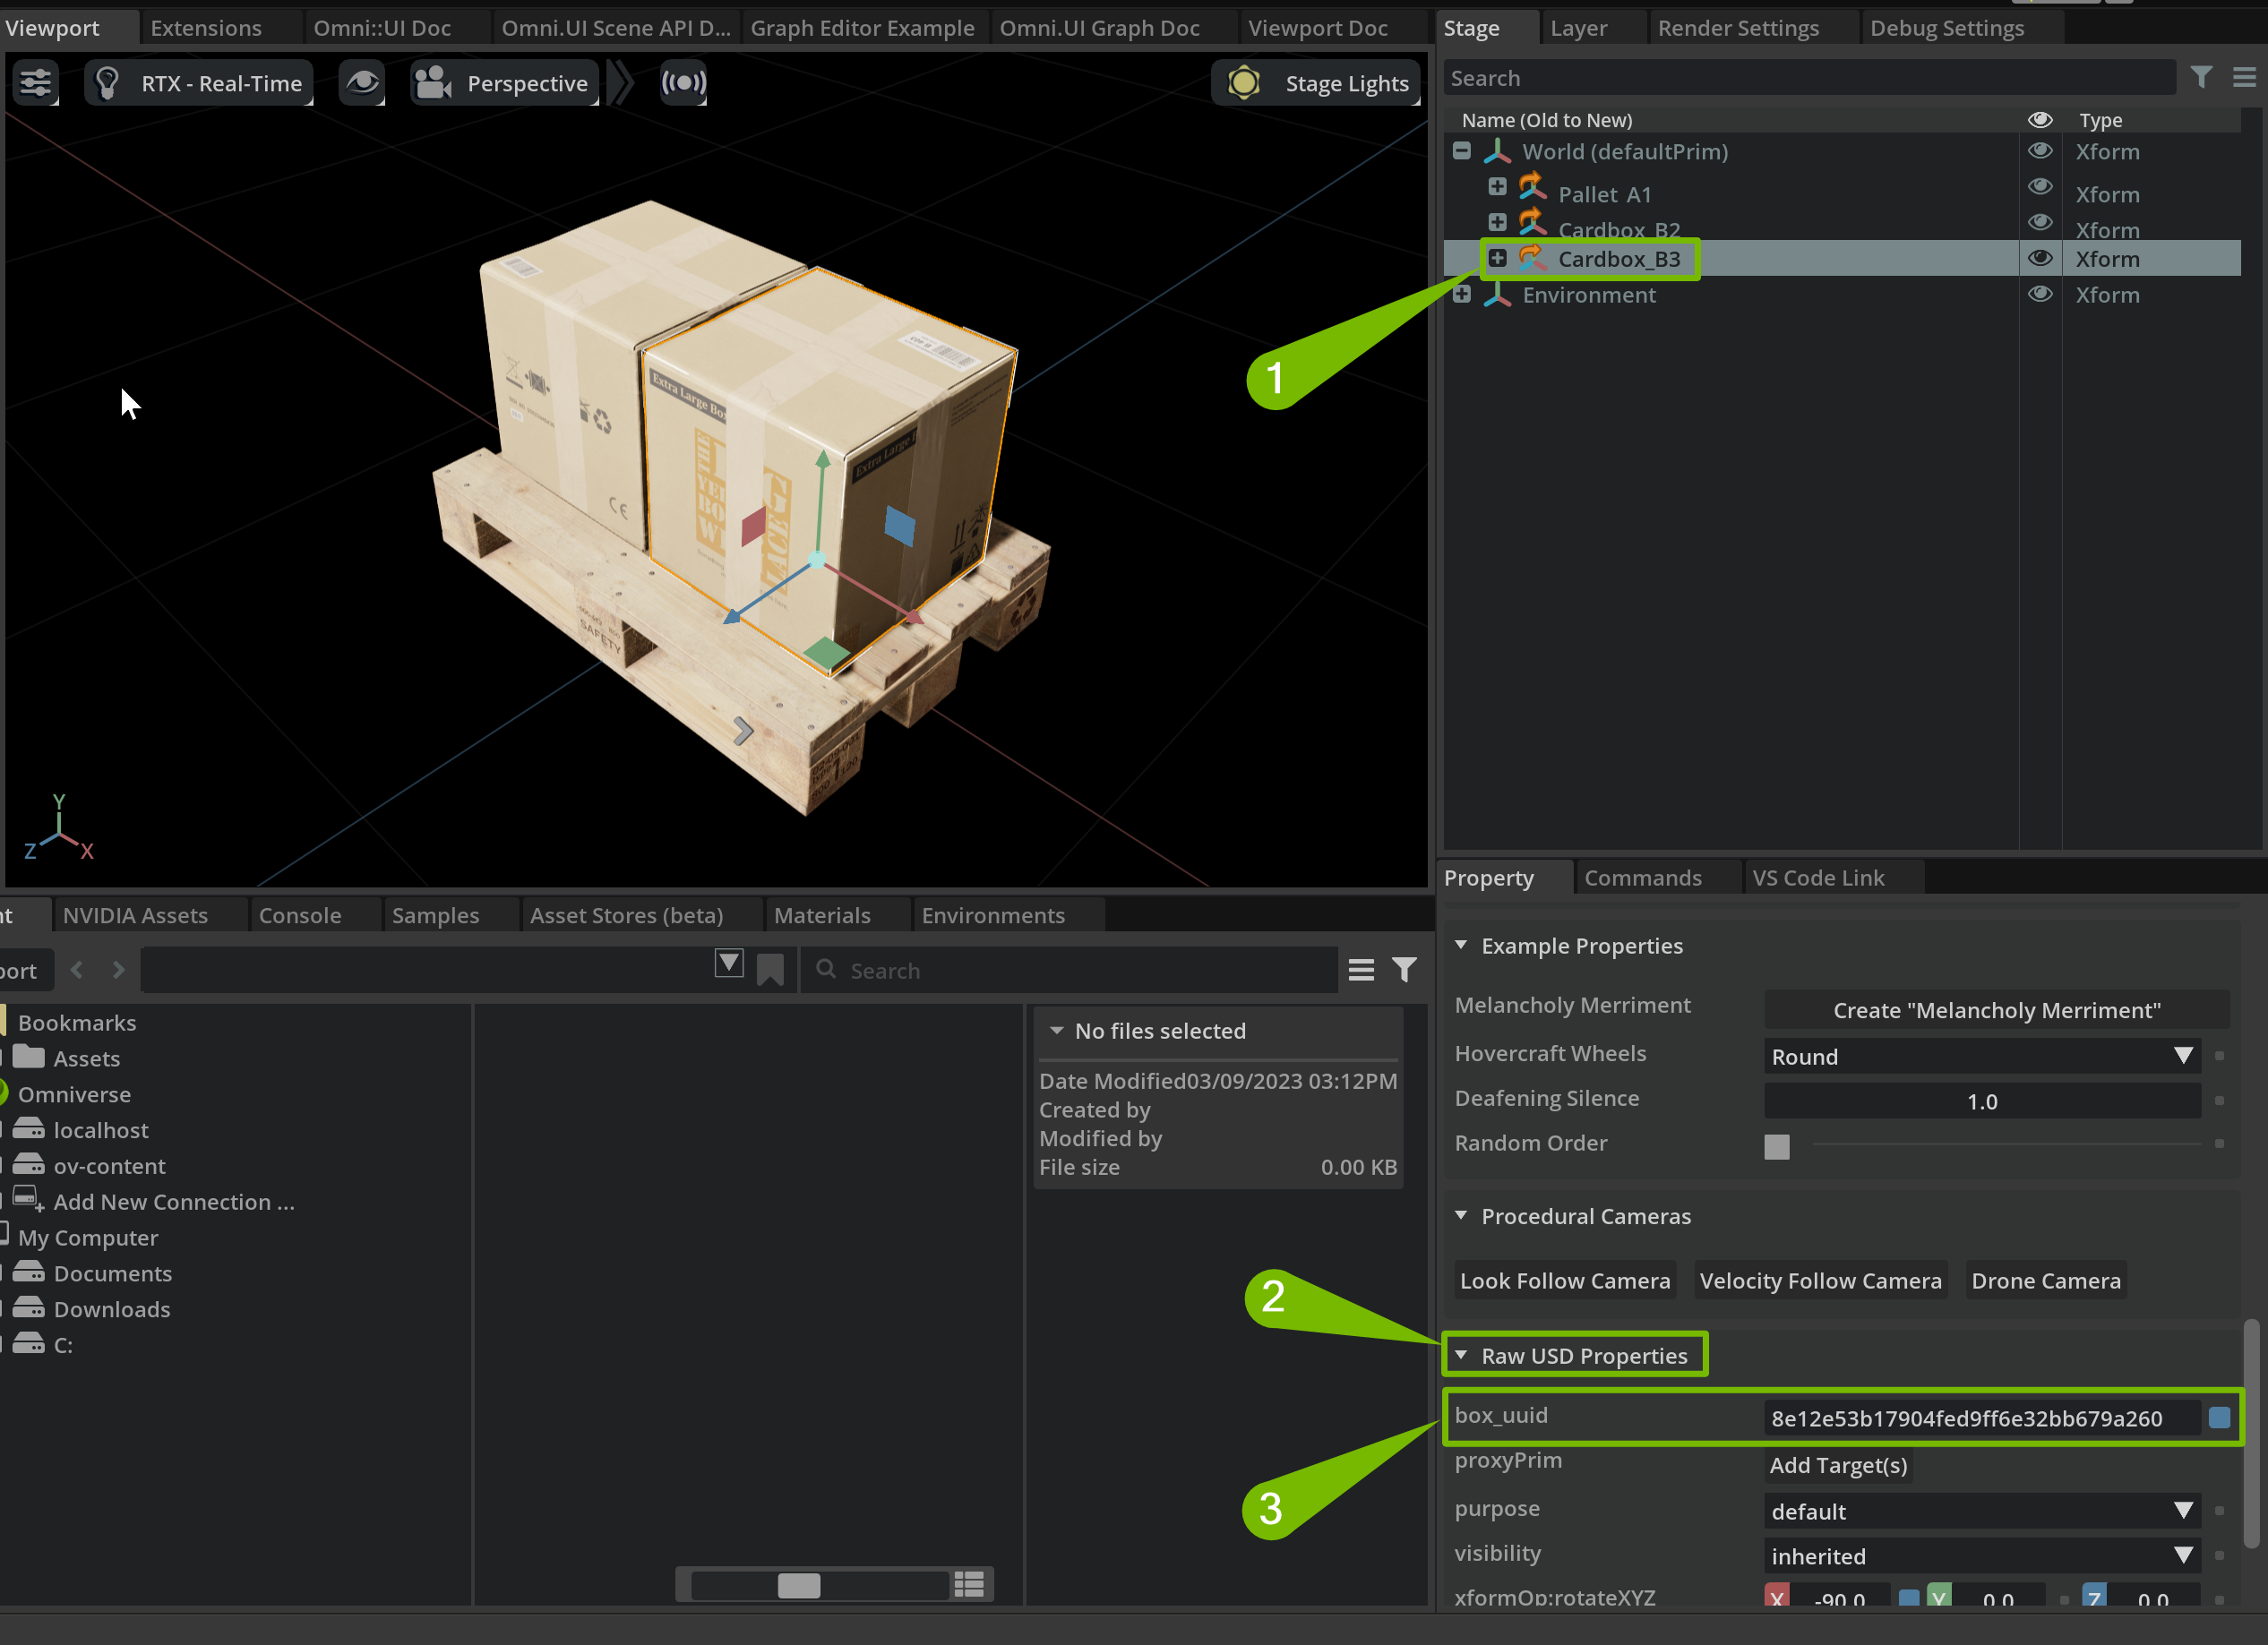

Being able to create attributes allow users to add data related to the prim. A UUID can be used to help track objects in a Warehouse Digital twin. Attributes could also be an expiration date for food prims in the scene, a color tint that get's read by a material, or even the name of a brand for a tire prim. 

### Complete Code for Step 2.6

In [ ]:
import omni.usd
from pxr import UsdGeom, Usd, Gf, Sdf
import uuid

BOX_WIDTH = 53.0

boxes = {
    "Cardbox_B2": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B2.usd",
    "Cardbox_B3": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B3.usd"
}

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
    xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble)
    xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, 0, 0]))
    xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
def add_boxes(stage, parent_prim, y_pos: float=21, y_rot: float= 0):
    start_x = -(BOX_WIDTH / 2)
    for i, box_name in enumerate(boxes):
        xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath(box_name))
        prim: Usd.Prim = xform.GetPrim()
        prim.GetReferences().AddReference(boxes[box_name])
        xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([start_x + i * BOX_WIDTH, y_pos, 0]))
        xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, y_rot, 0]))
        xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
        box_uuid =uuid.uuid4()
        prim.CreateAttribute("box_uuid", Sdf.ValueTypeNames.String).Set(box_uuid.hex)
        
stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)
add_boxes(stage, default_prim)



## Step 3 Variant Set

Variant Sets and variants allow for authoring a “switchable” state of a prim within a layer. When changing the current variant, USD will use what is defined within that variant into the current scene. There can only ever be one Variant active at a time for a VariantSet, but multiple Variant Sets could be operating on a prim at the same time.

### Step 3.1 Creating a Variant Set

**Add** the following code to the cell below:

``` python
config: Usd.VariantSet = default_prim.GetVariantSets().AddVariantSet("configuration")
config.AddVariant("default")
config.SetVariantSelection("default")
```

In [ ]:
import omni.usd
from pxr import UsdGeom, Usd, Gf

BOX_WIDTH = 53.0

boxes = {
    "Cardbox_B2": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B2.usd",
    "Cardbox_B3": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B3.usd"
}

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
    xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble)
    xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, 0, 0]))
    xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
def add_boxes(stage, parent_prim, y_pos: float=21, y_rot: float= 0):
    start_x = -(BOX_WIDTH / 2)
    for i, box_name in enumerate(boxes):
        xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath(box_name))
        prim: Usd.Prim = xform.GetPrim()
        prim.GetReferences().AddReference(boxes[box_name])
        xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([start_x + i * BOX_WIDTH, y_pos, 0]))
        xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, y_rot, 0]))
        xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)


# PASTE CODE UNDER HERE


# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)
add_boxes(stage, default_prim)

After running the cell, go into the *Stage Tab* then **select** our default Prim World. In the properties window there will be a new section called *Variants*. 

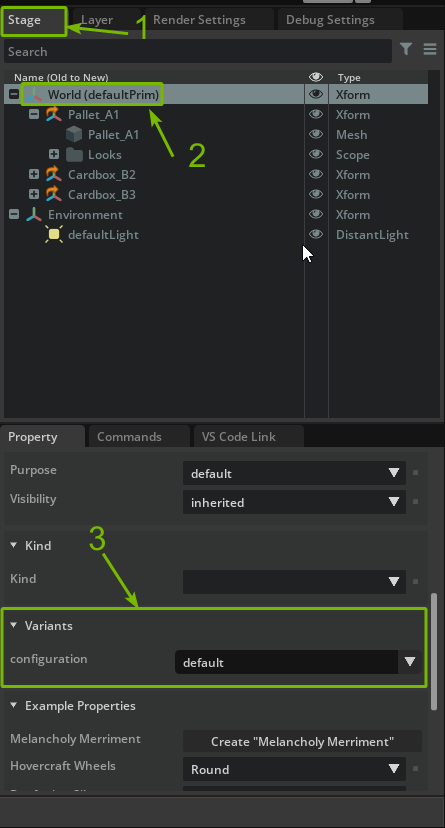


### Complete Code for Step 3.1

In [ ]:
import omni.usd
from pxr import UsdGeom, Usd, Gf

BOX_WIDTH = 53.0

boxes = {
    "Cardbox_B2": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B2.usd",
    "Cardbox_B3": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B3.usd"
}

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
    xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble)
    xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, 0, 0]))
    xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
def add_boxes(stage, parent_prim, y_pos: float=21, y_rot: float= 0):
    start_x = -(BOX_WIDTH / 2)
    for i, box_name in enumerate(boxes):
        xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath(box_name))
        prim: Usd.Prim = xform.GetPrim()
        prim.GetReferences().AddReference(boxes[box_name])
        xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([start_x + i * BOX_WIDTH, y_pos, 0]))
        xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, y_rot, 0]))
        xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

config: Usd.VariantSet = default_prim.GetVariantSets().AddVariantSet("configuration")
config.AddVariant("default")
config.SetVariantSelection("default")

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)
add_boxes(stage, default_prim)

### Step 3.2 Challenge: More Variants

**Add** another variant and call it "rotated". Does it show up in the drop down menu in the Variants section of the property tab?

In [ ]:
import omni.usd
from pxr import UsdGeom, Usd, Gf

BOX_WIDTH = 53.0

boxes = {
    "Cardbox_B2": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B2.usd",
    "Cardbox_B3": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B3.usd"
}

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
    xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble)
    xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, 0, 0]))
    xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
def add_boxes(stage, parent_prim, y_pos: float=21, y_rot: float= 0):
    start_x = -(BOX_WIDTH / 2)
    for i, box_name in enumerate(boxes):
        xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath(box_name))
        prim: Usd.Prim = xform.GetPrim()
        prim.GetReferences().AddReference(boxes[box_name])
        xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([start_x + i * BOX_WIDTH, y_pos, 0]))
        xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, y_rot, 0]))
        xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

config: Usd.VariantSet = default_prim.GetVariantSets().AddVariantSet("configuration")
config.AddVariant("default")

# CODE GOES UNDER HERE


config.SetVariantSelection("default")

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)
add_boxes(stage, default_prim)

### Complete Code for Step 3.2

In [ ]:
import omni.usd
from pxr import UsdGeom, Usd, Gf

BOX_WIDTH = 53.0

boxes = {
    "Cardbox_B2": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B2.usd",
    "Cardbox_B3": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B3.usd"
}

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
    xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble)
    xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, 0, 0]))
    xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
def add_boxes(stage, parent_prim, y_pos: float=21, y_rot: float= 0):
    start_x = -(BOX_WIDTH / 2)
    for i, box_name in enumerate(boxes):
        xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath(box_name))
        prim: Usd.Prim = xform.GetPrim()
        prim.GetReferences().AddReference(boxes[box_name])
        xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([start_x + i * BOX_WIDTH, y_pos, 0]))
        xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, y_rot, 0]))
        xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

config: Usd.VariantSet = default_prim.GetVariantSets().AddVariantSet("configuration")
config.AddVariant("default")
config.AddVariant("rotated")
config.SetVariantSelection("default")

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)
add_boxes(stage, default_prim)

### Step 3.3 Configuring Variants

Currently selecting a different Variant does not do anything and that is because we did not add any instructions for what each Variant should be. 

**Add** the following code to the cell below:

``` python
# Create the default config with boxes
with config.GetVariantEditContext():
    add_boxes(stage, default_prim)

# Create an alternate config with the boxes for variation
config.SetVariantSelection("rotated")
with config.GetVariantEditContext():
    add_boxes(stage, default_prim, y_rot=90)
```

In [ ]:
import omni.usd
from pxr import UsdGeom, Usd, Gf, Kind

BOX_WIDTH = 53.0

boxes = {
    "Cardbox_B2": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B2.usd",
    "Cardbox_B3": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B3.usd"
}

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
    xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble)
    xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, 0, 0]))
    xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
def add_boxes(stage, parent_prim, y_pos: float=21, y_rot: float= 0):
    start_x = -(BOX_WIDTH / 2)
    for i, box_name in enumerate(boxes):
        xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath(box_name))
        prim: Usd.Prim = xform.GetPrim()
        prim.GetReferences().AddReference(boxes[box_name])
        xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([start_x + i * BOX_WIDTH, y_pos, 0]))
        xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, y_rot, 0]))
        xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

config: Usd.VariantSet = default_prim.GetVariantSets().AddVariantSet("configuration")
config.AddVariant("default")
config.AddVariant("rotated")
config.SetVariantSelection("default")

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)



# PASTE CODE UNDER HERE



config.SetVariantSelection("default")

**Run** the cell and see what happens after switching between `default` and `rotated` Variants.

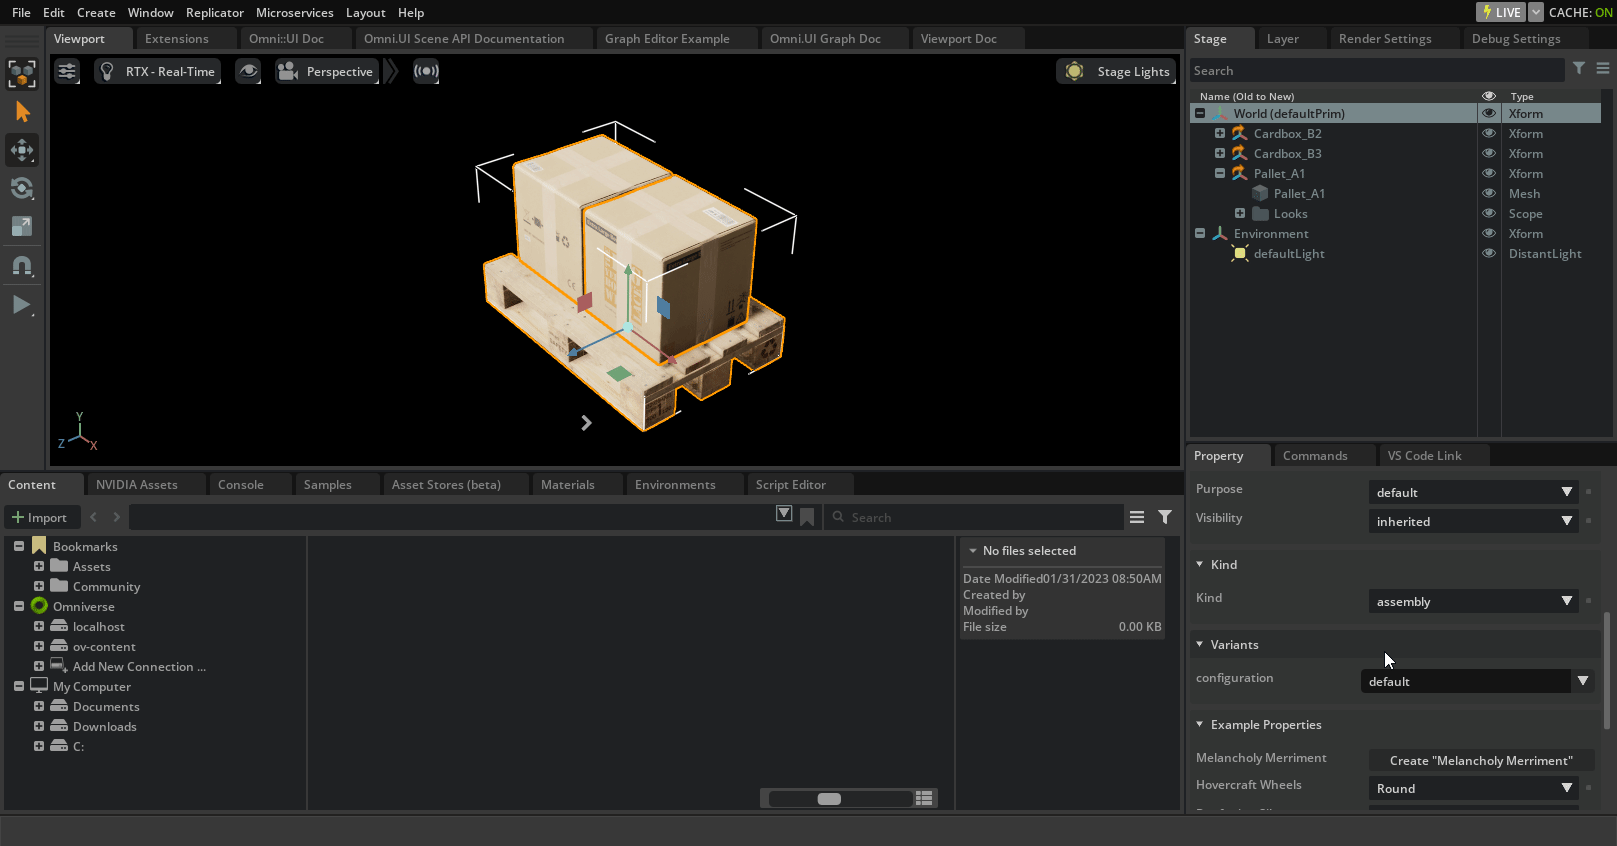

### Complete Code for Step 3.3

In [ ]:
import omni.usd
from pxr import UsdGeom, Usd, Gf, Kind

BOX_WIDTH = 53.0

boxes = {
    "Cardbox_B2": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B2.usd",
    "Cardbox_B3": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B3.usd"
}

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
    xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble)
    xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, 0, 0]))
    xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
def add_boxes(stage, parent_prim, y_pos: float=21, y_rot: float= 0):
    start_x = -(BOX_WIDTH / 2)
    for i, box_name in enumerate(boxes):
        xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath(box_name))
        prim: Usd.Prim = xform.GetPrim()
        prim.GetReferences().AddReference(boxes[box_name])
        xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([start_x + i * BOX_WIDTH, y_pos, 0]))
        xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, y_rot, 0]))
        xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

config: Usd.VariantSet = default_prim.GetVariantSets().AddVariantSet("configuration")
config.AddVariant("default")
config.AddVariant("rotated")
config.SetVariantSelection("default")

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)

# Create the default config with boxes
with config.GetVariantEditContext():
    add_boxes(stage, default_prim)

# Create an alternate config with the boxes for variation
config.SetVariantSelection("rotated")
with config.GetVariantEditContext():
    add_boxes(stage, default_prim, y_rot=90)

config.SetVariantSelection("default")

Usd.ModelAPI(default_prim).SetKind(Kind.Tokens.assembly) # Should this be added as a separate step? Maybe we could elaborate more on it

### Step 3.4 Challenge: Creating your own Variant

Create another Variant, here are some ideas:

1. Different Scaling of the boxes
2. Palettes stacked on top of each other
3. Boxes are stack on top of each other rather than next to each other

In [ ]:
import omni.usd
from pxr import UsdGeom, Usd, Gf, Kind

BOX_WIDTH = 53.0

boxes = {
    "Cardbox_B2": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B2.usd",
    "Cardbox_B3": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B3.usd"
}

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
    xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble)
    xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, 0, 0]))
    xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
def add_boxes(stage, parent_prim, y_pos: float=21, y_rot: float= 0):
    start_x = -(BOX_WIDTH / 2)
    for i, box_name in enumerate(boxes):
        xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath(box_name))
        prim: Usd.Prim = xform.GetPrim()
        prim.GetReferences().AddReference(boxes[box_name])
        xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([start_x + i * BOX_WIDTH, y_pos, 0]))
        xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, y_rot, 0]))
        xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)
    
stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

config: Usd.VariantSet = default_prim.GetVariantSets().AddVariantSet("configuration")
config.AddVariant("default")
config.AddVariant("rotated")
config.SetVariantSelection("default")

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)

# Create the default config with boxes
with config.GetVariantEditContext():
    add_boxes(stage, default_prim)

# Create an alternate config with the boxes for variation
config.SetVariantSelection("rotated")
with config.GetVariantEditContext():
    add_boxes(stage, default_prim, y_rot=90)

config.SetVariantSelection("default")

Usd.ModelAPI(default_prim).SetKind(Kind.Tokens.assembly) # Should this be added as a separate step? Maybe we could elaborate more on it

### Final Code

In [ ]:
import omni.usd
from pxr import UsdGeom, Gf, Usd, Kind

BOX_WIDTH = 53.0

boxes = {
    "Cardbox_B2": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B2.usd",
    "Cardbox_B3": "http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Containers/Cardboard/Cardbox_B3.usd"
}

def add_palette(stage, parent_prim):
    xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath("Pallet_A1"))
    prim: Usd.Prim = xform.GetPrim()
    prim.GetReferences().AddReference("http://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/ArchVis/Industrial/Pallets/Pallet_A1.usd")
    xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble)
    xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, 0, 0]))
    xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)


def add_boxes(stage, parent_prim, y_pos: float=21, y_rot: float= 0):
    start_x = -(BOX_WIDTH / 2)
    for i, box_name in enumerate(boxes):
        xform: UsdGeom.Xform = UsdGeom.Xform.Define(stage, parent_prim.GetPath().AppendPath(box_name))
        prim: Usd.Prim = xform.GetPrim()
        prim.GetReferences().AddReference(boxes[box_name])
        xform.AddTranslateOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([start_x + i * BOX_WIDTH, y_pos, 0]))
        xform.AddRotateXYZOp(UsdGeom.XformOp.PrecisionDouble).Set(Gf.Vec3d([-90, y_rot, 0]))
        xform.AddScaleOp(UsdGeom.XformOp.PrecisionDouble)


stage: Usd.Stage = omni.usd.get_context().get_stage()
# Need to remove the default prim to fully remove variant spec
stage.RemovePrim("/World")
default_prim = UsdGeom.Xform.Define(stage, "/World").GetPrim()
stage.SetDefaultPrim(default_prim)

config: Usd.VariantSet = default_prim.GetVariantSets().AddVariantSet("configuration")
config.AddVariant("default")
config.AddVariant("rotated")
config.SetVariantSelection("default")

# Create the empty palette outside of the Variant Set
add_palette(stage, default_prim)

# Create the default config with boxes
with config.GetVariantEditContext():
    add_boxes(stage, default_prim)

# Create an alternate config with the boxes for variation
config.SetVariantSelection("rotated")
with config.GetVariantEditContext():
    add_boxes(stage, default_prim, y_rot=90)

config.SetVariantSelection("default")
Usd.ModelAPI(default_prim).SetKind(Kind.Tokens.assembly)